# Problem VI: Analyzing Fouls in Soccer Data

**Version 0.1**

In this notebook you are asked to identify correlations in a data set that includes information about soccer (football) players and the number of times they are penalized (yellow cards and red cards) in the course of play. You will find correlations between different variables and be asked to supply interpretations for the correlations that have been identified. 

* * *

By Tiffany Nichols (Northeastern University)  
24 October 2024

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib ipympl
%matplotlib inline
# %matplotlib notebook

## Problem 1) Red Card Data

**Problem 1a** 

Load the red card data. What columns (i.e., variables) are present within the data? 

In [42]:
redcard_df = pd.read_csv("RedCards.csv")
redcard_df.dropna(axis=1, inplace=True) # remove empty unused columns
redcard_df

,Player,Club,POS,RACE,Red Cards
0,Abdoulie Mansally,HOU,D,B,1
1,Alberto Quintero,SJ,M,B,1
2,Alex Lima,HOU,M,B,1
3,Ambroise Oyongo,MTL,D,B,1
4,Anibal Godoy,SJ,M,B,2
...,...,...,...,...,...
58,Soni Mustivar,SKC,M,B,1
59,Tony Tchani,CLB,M,B,1
60,Tosaint Ricketts,TOR,F,B,1
61,Tyson Wahl,CLB,D,W,1


*write your response here*

The variables in this data set are Players, Club, Position, Race, Red Cards

**Problem 1b**

Prior to any numerical analysis which variable do you expect to be most strongly correlated with the number of red cards given to a player? 

*write your answer here*

Clubs will have a strong correlation with the no.of red cards. 

**Problem 1c**

Using the available data identify any trends or correlations present within the data. 

Do you identify any particularly strong correlations? 

*Hint* – you can use [Cramer's V](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V) to calculate the correlation between categorical variables. `scipy` provides the function [`association`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html) to calculate the value of Cramer's V. 

*Bonus hint* – Cramer's V is but one tool in your tool box. Can you think of others? Can you build a visualization to help develop intuition to answer this question? 

In [43]:
from scipy.stats.contingency import association
import seaborn as sns
from scipy.stats import chi2_contingency


Cramér's V: 0.11009637651263605


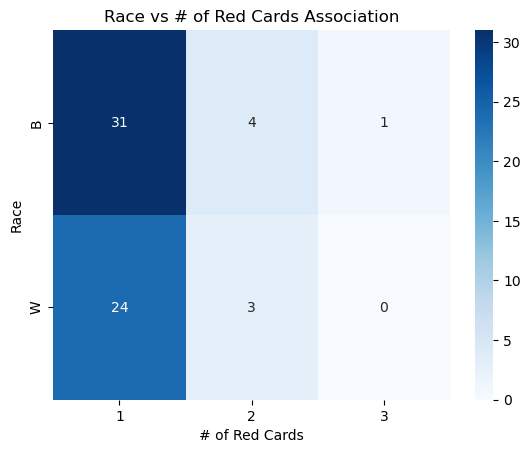

In [44]:
# Example: Association between 'Race' and '# of Red Cards'
contingency_table = pd.crosstab(redcard_df['RACE'], redcard_df['Red Cards'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()  # Total number of observations
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape)-1)))

print(f"Cramér's V: {cramers_v}")

# Heatmap for visualization
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='g')
plt.title("Race vs # of Red Cards Association")
plt.xlabel("# of Red Cards")
plt.ylabel("Race")
plt.show()

Cramér's V: 0.45811584765223945


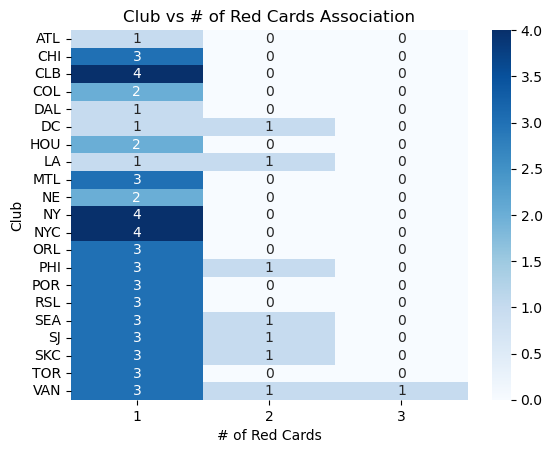

In [45]:
# Example: Association between 'Race' and '# of Red Cards'
contingency_table = pd.crosstab(redcard_df['Club'], redcard_df['Red Cards'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()  # Total number of observations
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape)-1)))

print(f"Cramér's V: {cramers_v}")

# Heatmap for visualization
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='g')
plt.title("Club vs # of Red Cards Association")
plt.xlabel("# of Red Cards")
plt.ylabel("Club")
plt.show()

Cramér's V: 0.14780697918874838


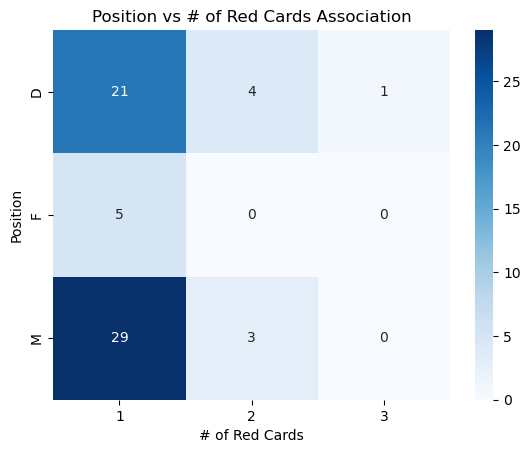

In [46]:
# Example: Association between 'Race' and '# of Red Cards'
contingency_table = pd.crosstab(redcard_df['POS'], redcard_df['Red Cards'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()  # Total number of observations
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape)-1)))

print(f"Cramér's V: {cramers_v}")

# Heatmap for visualization
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='g')
plt.title("Position vs # of Red Cards Association")
plt.xlabel("# of Red Cards")
plt.ylabel("Position")
plt.show()

*write your answer here*

In [47]:
# # Melt the dataframe to have all variables (Position, Club, # of Red Cards) under one column
# melted_df = pd.melt(redcard_df, id_vars=['Red Cards'], value_vars=['POS', 'Club', 'RACE'], 
#                     var_name='Variable', value_name='Value')

# # Create a grouped bar plot
# plt.figure(figsize=(12, 6))
# sns.countplot(x=redcard_df['RACE'], hue='Value', data=melted_df, palette='Set2', dodge=True)
# plt.title("Association of Race with Position, Club, and # of Red Cards")
# plt.ylabel('Count')
# plt.xlabel('Race')
# plt.xticks(rotation=45)
# plt.legend(title='Variable')
# plt.tight_layout()
# plt.show()

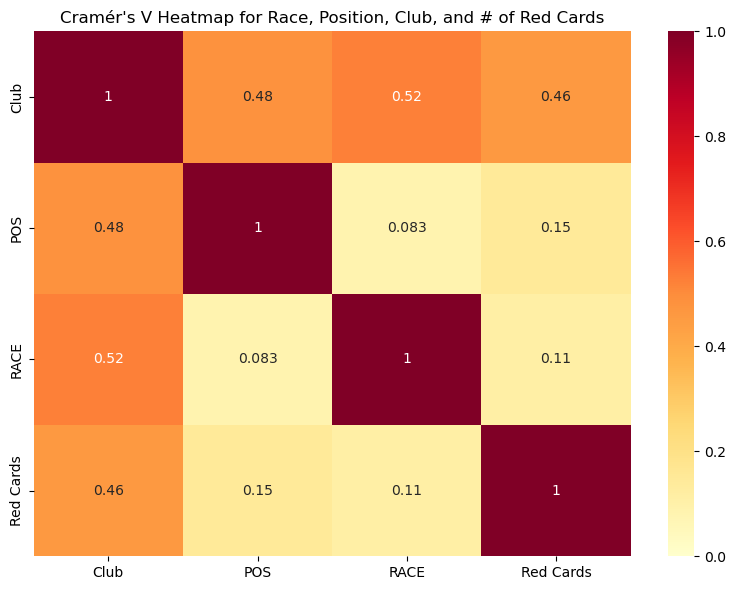

In [54]:
# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    #print(n)
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# List of variables for the correlation
variables = ['Club', 'POS', 'RACE', 'Red Cards']

# Initialize an empty DataFrame to store Cramér's V values
cramers_v_matrix = pd.DataFrame(index=variables, columns=variables)

# Calculate pairwise Cramér's V for all variables
for var1 in variables:
    for var2 in variables:
        if var1 == var2:
            cramers_v_matrix.loc[var1, var2] = 1.0  # Cramér's V of a variable with itself is 1
        else:
            confusion_matrix = pd.crosstab(redcard_df[var1], redcard_df[var2])
            cramers_v_matrix.loc[var1, var2] = cramers_v(confusion_matrix)

# Convert to numeric for the heatmap
cramers_v_matrix = cramers_v_matrix.astype(float)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='YlOrRd', vmin=0, vmax=1, cbar=True)
plt.title("Cramér's V Heatmap for Race, Position, Club, and # of Red Cards")
plt.tight_layout()
plt.show()

## Problem 2) Total Fouls

**Problem 2a** 

Load the data for total fouls (red cards + yellow cards). 

What columns (i.e., variables) are present within the data? 

In [56]:
redcard_df = pd.read_csv("TotalFouls.csv")
redcard_df.dropna(axis=1, inplace=True) # remove empty unused columns
redcard_df

,Player,Club,POS,RACE,GP,GS,MINS,Fouls
0,A.J. DeLaGarza,LA,D,W,24,23,2064,21
1,Aaron Kovar,SEA,M,W,16,10,811,12
2,Aaron Maund,RSL,D,B,20,20,1746,24
3,Adrian Winter,ORL,M,W,13,12,975,18
4,Alan Gordon,LA,F,W,22,7,710,17
...,...,...,...,...,...,...,...,...
315,Will Johnson,TOR,M,W,23,19,1660,21
316,Yura Movsisyan,RSL,F,W,29,25,2161,18
317,Zach Loyd,DAL,D,W,12,10,919,4
318,Zach Scott,SEA,D,W,14,9,886,7


*write your response here*

The variables in this data set are Player Name, Club, Position, Race, GP, GS, Minutes on field, Fouls

**Problem 2b**

Using the available data identify any trends or correlations present within the data. 

Do you identify any particularly strong correlations? 

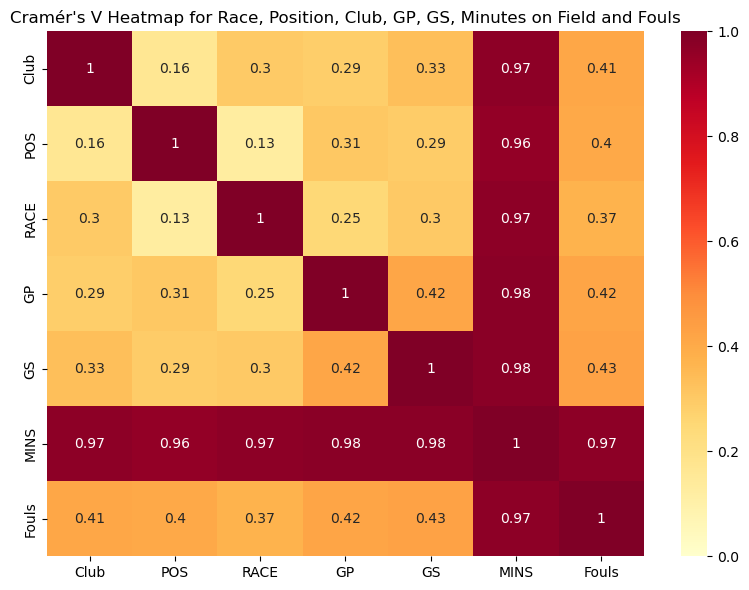

In [59]:
# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# List of variables for the correlation
variables = ['Club', 'POS', 'RACE', 'GP', 'GS', 'MINS', 'Fouls']

# Initialize an empty DataFrame to store Cramér's V values
cramers_v_matrix = pd.DataFrame(index=variables, columns=variables)

# Calculate pairwise Cramér's V for all variables
for var1 in variables:
    for var2 in variables:
        if var1 == var2:
            cramers_v_matrix.loc[var1, var2] = 1.0  # Cramér's V of a variable with itself is 1
        else:
            confusion_matrix = pd.crosstab(redcard_df[var1], redcard_df[var2])
            cramers_v_matrix.loc[var1, var2] = cramers_v(confusion_matrix)

# Convert to numeric for the heatmap
cramers_v_matrix = cramers_v_matrix.astype(float)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='YlOrRd', vmin=0, vmax=1, cbar=True)
plt.title("Cramér's V Heatmap for Race, Position, Club, GP, GS, Minutes on Field and Fouls")
plt.tight_layout()
plt.show()

## Problem 3

**Problem 3a**

Merge the data in the two data files and identify any trends or correlations that you find. 

*Hint – the first data file includes all players that received red cards. To determine the number of yellow cards subtract red cards from total fouls*

In [71]:
# Now merging these two tables into a new df

merged_df = pd.merge(pd.read_csv("RedCards.csv"), pd.read_csv("TotalFouls.csv"), on=['Player', 'Club', 'POS', 'RACE'], how='inner')
merged_df = merged_df.loc[:, ~merged_df.columns.str.contains('^Unnamed')]

# Display the merged DataFrame
merged_df

,Player,Club,POS,RACE,Red Cards,GP,GS,MINS,Fouls
0,Alberto Quintero,SJ,M,B,1,30,29,2230,25
1,Alex Lima,HOU,M,B,1,30,29,2476,40
2,Ambroise Oyongo,MTL,D,B,1,27,26,2316,13
3,Anibal Godoy,SJ,M,B,2,23,23,1941,45
4,Antonio Nocerino,ORL,M,W,1,21,19,1509,27
5,Ashley Cole,LA,D,B,2,26,25,2227,22
6,Aurelien Collin,NY,D,W,1,25,22,2067,37
7,Benoit Cheyrou,TOR,M,W,1,14,9,800,9
8,Brad Evans,SEA,D,W,2,23,21,1866,12
9,Calum Mallace,MTL,M,W,1,18,10,862,11
